In [1]:
import ratinabox
from ratinabox.Environment import Environment
from ratinabox.Agent import Agent
from ratinabox.Neurons import *

import matplotlib.pyplot as plt 

%load_ext autoreload
%autoreload 2

100%|██████████| 20000/20000 [00:12<00:00, 1638.27it/s]


Text(0.5, 1.0, 'Trajectory')

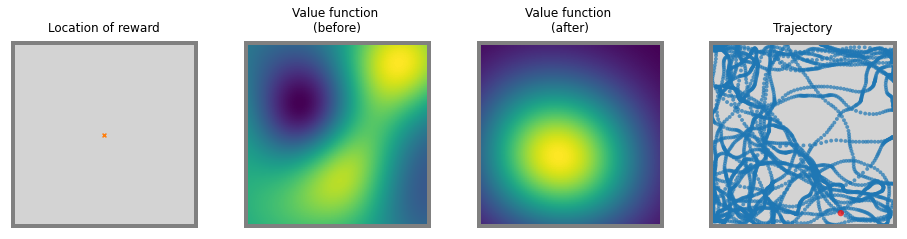

In [7]:
from ratinabox.contribs.ValueNeuron import ValueNeuron
from tqdm import tqdm 
Env = Environment()
Ag = Agent(Env,
            params={'speed_mean':0.2})
PCs = PlaceCells(Ag,
            params={'n':100})
Reward = PlaceCells(Ag,
            params={'n':1,
                    'place_cell_centres':np.array([[0.5,0.5]])})
VN = ValueNeuron(Ag,
            params={'input_layer':PCs,
                    'tau':1,})

fig, ax = plt.subplots(1,4,figsize=(16,4))
Reward.plot_place_cell_locations(fig=fig,ax=ax[0])
ax[0].set_title("Location of reward")
VN.plot_rate_map(fig=fig,ax=ax[1])
ax[1].set_title("Value function \n(before)")

for i in tqdm(range(int(200/Ag.dt))):
    Ag.update()
    Reward.update()
    PCs.update()
    VN.update()
    VN.update_weights(reward = Reward.firingrate[0])
VN.plot_rate_map(fig=fig,ax=ax[2])
ax[2].set_title("Value function \n(after)")
Ag.plot_trajectory(fig=fig,ax=ax[3],framerate=20)
ax[3].set_title("Trajectory")


0.20804336455865802


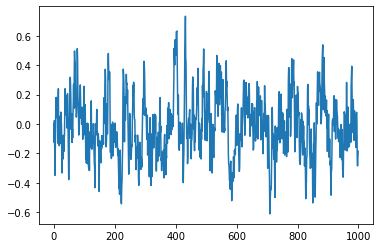

In [35]:
def ornstein_uhlenbeck(dt, x, drift=0.0, noise_scale=0.2, coherence_time=5.0):
    """An ornstein uhlenbeck process in x.
    x can be multidimensional 
    Args:
        dt: update time step
        x: the stochastic variable being updated
        drift (float, or same type as x, optional): [description]. Defaults to 0.
        noise_scale (float, or same type as v, optional): Magnitude of deviations from drift. Defaults to 0.2 (20 cm s^-1 if units of x are in metres).
        coherence_time (float, optional): Effectively over what time scale you expect x to change directions. Defaults to 5.

    Returns:
        dx (same type as x); the required update ot the velocity
    """
    x = np.array(x)
    drift = drift * np.ones_like(x)
    noise_scale = noise_scale * np.ones_like(x)
    coherence_time = coherence_time * np.ones_like(x)
    sigma = np.sqrt((2 * noise_scale ** 2) / (dt * coherence_time))
    theta = 1 / coherence_time
    dx = theta * (drift - x) * dt + sigma * np.random.normal(size=x.shape, scale=dt)
    return dx


dt = 1
t,T = 0, []
x,X = 0, []

while t < 1000:
    T.append(t)
    X.append(x)
    x += ornstein_uhlenbeck(dt,x)
    t += dt

fig, ax = plt.subplots()
ax.plot(T,X)
print(np.std(np.array(X)))



In [37]:
scipy.stats.norm.cdf(0)

0.5